In [593]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cbook import boxplot_stats
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from sklearn.impute import SimpleImputer

Import datasets

In [594]:
df = pd.read_csv("survey_results_public.csv")
df_exp = pd.read_csv("survey_results_schema.csv")

Check variable names and the related questions.

In [595]:
df_exp.sort_values("Column")

,Column,QuestionText
77,Age,What is your age (in years)? If you prefer not...
14,Age1stCode,At what age did you write your first line of c...
58,BetterLife,Do you think people born today will have a bet...
57,BlockchainIs,Blockchain / cryptocurrency technology is prim...
56,BlockchainOrg,How is your organization thinking about or imp...
16,CareerSat,"Overall, how satisfied are you with your caree..."
38,CodeRev,Do you review code as part of your work?
39,CodeRevHrs,"On average, how many hours per week do you spe..."
30,CompFreq,"Is that compensation weekly, monthly, or yearly?"
29,CompTotal,What is your current total compensation (salar...


Print out full question names for a specific question.

In [596]:
df_exp.iloc[31,1]

'Salary converted to annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks.'

How many rows and columns do we have in the original dataframe.

In [597]:
df.shape

(88883, 85)

First three rows of the dataset.

In [598]:
df.head(3)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

Drop Respondent feature as its not needed

In [599]:
df.drop("Respondent", axis=1, inplace=True)

In this project only data from Sweden will be investigated. Hence we create a condition on country Sweden.

In [600]:
df_sw = df[df["Country"] == "Sweden"].copy()

Check the shape of the dataframe with only Sweden.

In [601]:
df_sw.shape

(1274, 84)

Drop rows with no compensation information

In [602]:
df_sw.drop(df_sw[df_sw["CompTotal"].isna()].index, axis=0, inplace=True)

Check some statistcs for the dataframe.

In [603]:
df_sw.describe(include="all")

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
count,907,907,907,885,907,907,902,894,802,884,895,901,905,906,906,907,906,787,788,788,907,905,840,904,905,884,907,907,9.070000e+02,907,907.000000,904.000000,896,878,907,901,904,905,680.000000,825,804,822,906,864,757,659,844,788,669,622,661,677,898,899,898,634,642,899,897,893,884,901,847,868,907,906,907,881,651,907,777,906,906,907,893,627,864.000000,894,886,849,847,882,904,903
unique,2,2,4,3,3,1,3,9,12,186,9,416,42,32,35,5,5,4,3,4,3,5,52,2,112,6,6,6,NaN,3,NaN,NaN,3,120,7,3,5,3,NaN,4,4,3,615,676,292,265,424,445,198,164,133,225,340,4,16,5,5,2,4,3,11,3,5,13,5,34,5,5,4,3,6,3,3,6,6,15,NaN,5,2,6,22,2,3,3
top,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,Sweden,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...","Taught yourself a new language, framework, or ...",20 to 99 employees,"Developer, full-stack",20,15,5,Very satisfied,Very satisfied,Somewhat confident,No,No,"I’m not actively looking, but I am open to new...",Less than a year ago,Interview with people in peer roles;Interview ...,No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,SEK,Swedish krona,NaN,Monthly,NaN,NaN,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Distrac...,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",NaN,"Yes, it's part of our process",Developers and management have nearly equal in...,I have some influence,C#;HTML/CSS;JavaScript;SQL,C#,Microsoft SQL Server,Microsoft SQL Server,Windows,Linux,React.js,React.js,Node.js,Node.js,Visual Studio;Visual Studio Code,Windows,I do not use containers,Not at all,Useful for immutable record keeping outside of...,Yes,Yes,Yes,Reddit,In real life (in person),Username,2010,Daily or almost daily,Find answers to specific questions,1-2 times per week,Stack Overflow was much faster,11-30 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers,NaN,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
freq,814,751,294,456,816,907,841,307,507,67,205,86,84,101,85,408,355,338,436,344,481,285,231,797,103,377,880,880,NaN,784,NaN,NaN,552,46,409,657,435,667,NaN,385,279,363,20,14,94,51,76,34,50,71,107,86,80,403,337,557,209,566,491,758,208,624,725,165,329,429,276,398,270,780,378,452,490,281,747,101,NaN,837,878,790,778,502,637,644
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.234625e+05,NaN,76865.636163,47.676715,NaN,NaN,NaN,NaN,NaN,NaN,4.122721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.577546,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Check datatypes and missing info for the data.

In [604]:
df_sw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907 entries, 53 to 88249
Data columns (total 84 columns):
MainBranch                907 non-null object
Hobbyist                  907 non-null object
OpenSourcer               907 non-null object
OpenSource                885 non-null object
Employment                907 non-null object
Country                   907 non-null object
Student                   902 non-null object
EdLevel                   894 non-null object
UndergradMajor            802 non-null object
EduOther                  884 non-null object
OrgSize                   895 non-null object
DevType                   901 non-null object
YearsCode                 905 non-null object
Age1stCode                906 non-null object
YearsCodePro              906 non-null object
CareerSat                 907 non-null object
JobSat                    906 non-null object
MgrIdiot                  787 non-null object
MgrMoney                  788 non-null object
MgrWant           

What values and how common are they for the variable "LanguageWorkedWith".

In [605]:
df_sw["LanguageWorkedWith"].value_counts()

C#;HTML/CSS;JavaScript;SQL                                            20
C#;HTML/CSS;JavaScript;SQL;TypeScript                                 19
Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;SQL;TypeScript           18
HTML/CSS;JavaScript                                                   16
C#                                                                    14
                                                                      ..
C;Objective-C;Python;Ruby;Swift                                        1
Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;Kotlin;SQL;TypeScript     1
C++;C#;Rust;SQL;TypeScript                                             1
HTML/CSS;Java;JavaScript;Kotlin;SQL                                    1
C;C++;Java;VBA                                                         1
Name: LanguageWorkedWith, Length: 615, dtype: int64

Split upp all the values in "LanguageWorkedWith" to one-hot-encoded format

In [606]:
df_sw = pd.concat([df_sw, df_sw["LanguageWorkedWith"].str.get_dummies(sep=";")], axis=1)

Drop the "LanguageWorkedWith" column.

In [607]:
df_sw.drop("LanguageWorkedWith", axis=1, inplace=True)

Most popular programming languages

In [608]:
df_sw.iloc[:,-30:].sum(axis=0).sort_values(ascending=False)

JavaScript               607
HTML/CSS                 527
SQL                      445
Bash/Shell/PowerShell    414
C#                       356
Python                   344
Java                     294
TypeScript               236
C++                      164
PHP                      146
C                        128
Go                        87
Other(s):                 76
Kotlin                    71
Ruby                      59
Swift                     54
Scala                     44
Rust                      40
Objective-C               35
R                         33
Assembly                  30
VBA                       23
Erlang                    20
F#                        19
Elixir                    16
Dart                      10
Clojure                   10
WebAssembly                8
dtype: int64

Get the column names for the new one hot encoded programming features.

In [609]:
prog_lang_cols = df_sw.columns[-28:].tolist()

For "Age1stCode" feture there is a text value and a NaN these will be removed

In [610]:
mask1 = df_sw["Age1stCode"].isna()
mask2 = df_sw["Age1stCode"]=="Younger than 5 years"
df_sw.drop(df_sw[mask1 | mask2].index, axis=0, inplace=True)

After removing the above two rows we can convert this to a numeric datatype

In [611]:
df_sw["Age1stCode"] = df_sw["Age1stCode"].astype("int")

Convert YearsCode to float instead of string eventought its an int, but dont want to deal with the NaN for now. Also drop one row with the value "More than 50 years".

In [612]:
df_sw.drop(df_sw[df_sw["YearsCode"] == "More than 50 years"].index, axis=0, inplace=True)

In [613]:
df_sw["YearsCode"] = df_sw["YearsCode"].astype("float")

Dropping rows that have a currency other than Swedish Krone. Its weird how they can leave in Sweden and have a different currency income than SEK. Maybe they work remote or the users have converted the local currency to another. Nevertheless, for simlicity the are removed.

In [614]:
df_sw.drop(df_sw[df_sw["CurrencySymbol"]!="SEK"].index, axis=0, inplace=True)

Do we have only SEK as currency? Yes.

In [615]:
df_sw["CurrencySymbol"].value_counts()

SEK    877
Name: CurrencySymbol, dtype: int64

# Exploratory Analysis

What values and how common are they for the variable "WorkRemote".

In [616]:
df_sw["WorkRemote"].value_counts(dropna=False)

Less than once per month / Never                           398
A few days each month                                      295
Less than half the time, but at least one day each week     83
All or almost all the time (I'm full-time remote)           41
It's complicated                                            23
More than half, but not all, the time                       19
About half the time                                         18
Name: WorkRemote, dtype: int64

What values and how common are they for the variable "WorkLoc".

In [617]:
df_sw["WorkLoc"].value_counts(dropna=False)

Office                                            636
Home                                              187
Other place, such as a coworking space or cafe     48
NaN                                                 6
Name: WorkLoc, dtype: int64

What values and how common are they for the variable "MainBranch".

In [618]:
df_sw["MainBranch"].value_counts()

I am a developer by profession                                                   789
I am not primarily a developer, but I write code sometimes as part of my work     88
Name: MainBranch, dtype: int64

What values and how common are they for the variable "CompFreq".

In [619]:
df_sw["CompFreq"].value_counts(dropna=False)

Monthly    764
Yearly     105
Weekly       8
Name: CompFreq, dtype: int64

What values and how common are they for the variable "CareerSat".

In [620]:
df_sw["CareerSat"].value_counts()

Very satisfied                        395
Slightly satisfied                    329
Neither satisfied nor dissatisfied     61
Slightly dissatisfied                  60
Very dissatisfied                      32
Name: CareerSat, dtype: int64

What values and how common are they for the variable "JobSat".

In [621]:
df_sw["JobSat"].value_counts()

Very satisfied                        347
Slightly satisfied                    302
Slightly dissatisfied                 102
Neither satisfied nor dissatisfied     81
Very dissatisfied                      44
Name: JobSat, dtype: int64

What values and how common are they for the variable "Gender".

In [622]:
df_sw["Gender"].value_counts(dropna=False)

Man                                                        811
Woman                                                       43
NaN                                                         11
Man;Non-binary, genderqueer, or gender non-conforming        5
Non-binary, genderqueer, or gender non-conforming            5
Woman;Non-binary, genderqueer, or gender non-conforming      2
Name: Gender, dtype: int64

What values and how common are they for the variable "Sexuality".

In [623]:
df_sw["Sexuality"].value_counts(dropna=False)

Straight / Heterosexual                   766
NaN                                        53
Bisexual                                   38
Gay or Lesbian                             10
Bisexual;Straight / Heterosexual            8
Gay or Lesbian;Straight / Heterosexual      1
Bisexual;Gay or Lesbian                     1
Name: Sexuality, dtype: int64

What values and how common are they for the variable "CompTotal".

In [624]:
df_sw["CompTotal"]

53        51500.0
114       30000.0
227       33000.0
232       41400.0
243      490000.0
           ...   
87896     28000.0
87926     35000.0
87938     32400.0
88046     30000.0
88249     55000.0
Name: CompTotal, Length: 877, dtype: float64

Fix new compensation feature with per month compensation instead having yearly and weekly.

In [625]:
df_sw["CompFixed"] = df_sw["CompTotal"]
df_sw.loc[df_sw["CompFreq"]=="Yearly", "CompFixed"] = df_sw.loc[df_sw["CompFreq"]=="Yearly", "CompFixed"]/12
df_sw.loc[df_sw["CompFreq"]=="Weekly", "CompFixed"] = df_sw.loc[df_sw["CompFreq"]=="Weekly", "CompFixed"]*52

Drop CompFreq and CompTotal as they are not needed anymore.

In [626]:
df_sw.drop(["CompFreq", "CompTotal", "ConvertedComp"], axis=1, inplace=True)

What values and how common are they for the variable "WorkLoc".

In [627]:
df_sw["WorkLoc"].value_counts()

Office                                            636
Home                                              187
Other place, such as a coworking space or cafe     48
Name: WorkLoc, dtype: int64

What values and how common are they for the variable "Employment".

In [628]:
df_sw["Employment"].value_counts()

Employed full-time                                      792
Independent contractor, freelancer, or self-employed     67
Employed part-time                                       18
Name: Employment, dtype: int64

Print some statistics from numerical data types.

In [629]:
df_sw.describe()

,YearsCode,Age1stCode,WorkWeekHrs,CodeRevHrs,Age,Assembly,Bash/Shell/PowerShell,C,C#,C++,Clojure,Dart,Elixir,Erlang,F#,Go,HTML/CSS,Java,JavaScript,Kotlin,Objective-C,Other(s):,PHP,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA,WebAssembly,CompFixed
count,875.000000,877.000000,874.000000,659.000000,836.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,8.770000e+02
mean,15.494857,14.026226,48.012300,4.126631,33.583732,0.030787,0.459521,0.136830,0.392246,0.177879,0.011403,0.011403,0.015964,0.022805,0.021665,0.096921,0.583808,0.322691,0.672748,0.079818,0.036488,0.082098,0.164196,0.377423,0.035348,0.066135,0.042189,0.492588,0.049031,0.060433,0.259977,0.025086,0.007982,7.157242e+04
std,8.852383,4.341895,133.783276,3.238009,7.733831,0.172838,0.498643,0.343864,0.488530,0.382629,0.106233,0.106233,0.125406,0.149367,0.145669,0.296019,0.493207,0.467772,0.469478,0.271165,0.187608,0.274671,0.370665,0.485019,0.184763,0.248659,0.201135,0.500230,0.216056,0.238424,0.438872,0.156474,0.089034,1.927271e+05
min,1.000000,5.000000,7.500000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.500000e+01
25%,8.000000,11.000000,40.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000e+04
50%,14.000000,14.000000,40.000000,4.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.200000e+04
75%,20.000000,16.000000,40.000000,5.000000,38.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.100000e+04
max,40.000000,45.000000,3875.000000,30.000000,63.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.120000e+06


Remove outlier for workweekhours. Removing all rows that have a WorkWeekHrs value of more than 100. For the time being dropping these is the fastest, maybe at a later stage we could try to understand on which basis these hours were calculated.

In [630]:
df_sw.drop(df_sw[df_sw["WorkWeekHrs"] > 100].index, axis=0, inplace=True)

Print the 20 largest values for the WorkWeekHrs feature.

In [631]:
df_sw["WorkWeekHrs"].nlargest(20)#.sort_values(ascending=False)

407      80.0
70341    80.0
1471     70.0
3702     70.0
21507    70.0
18266    60.0
34166    60.0
41285    60.0
42830    60.0
48397    60.0
51862    60.0
35205    56.0
42600    55.0
85331    55.0
4877     50.0
5712     50.0
7028     50.0
14955    50.0
24847    50.0
28032    50.0
Name: WorkWeekHrs, dtype: float64

Plot a distribution plot of the workweekhrs

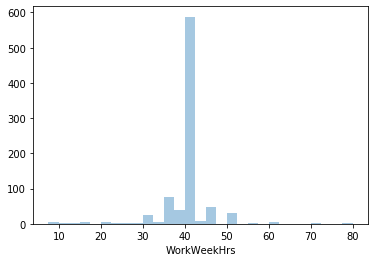

In [632]:
sns.distplot(df_sw["WorkWeekHrs"], kde=False)

Plot the 10 larges values for CompFixed.

In [633]:
df_sw["CompFixed"].nlargest(10)

33220    3120000.0
71347    2548000.0
52485    2080000.0
48720    1872000.0
34929    1458600.0
49478    1310000.0
23364    1067001.0
21138    1000000.0
48824     612000.0
77099     600000.0
Name: CompFixed, dtype: float64

Plot a histogram of the CompFixed feature.

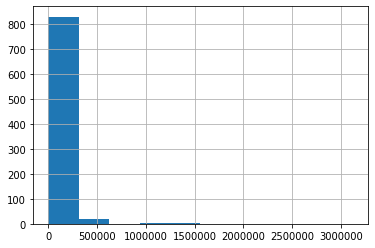

In [634]:
df_sw["CompFixed"].hist()

Distribution plot with and without KDE and removed values > 200.000SEK.

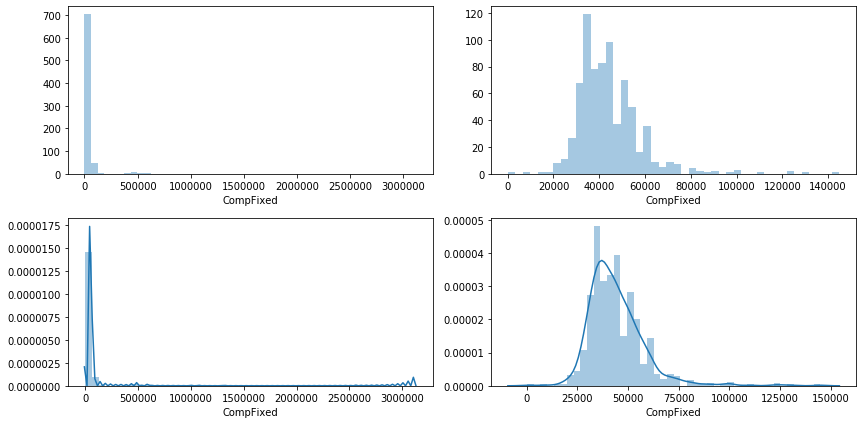

In [448]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
#df_sw[(df_sw["CompFreq"]=="Monthly") & (df_sw["Employment"] == "Employed full-time")]["CompTotal"].hist(ax=ax)
#ax.set_xlim(None, 200000)
sns.distplot(df_sw[(df_sw["Employment"] == "Employed full-time")]["CompFixed"], kde=False, ax=ax[0,0])#.hist(ax=ax))
sns.distplot(df_sw[(df_sw["Employment"] == "Employed full-time") & (df_sw["CompFixed"] <200000)]["CompFixed"], kde=False, ax=ax[0,1])#.hist(ax=ax))
sns.distplot(df_sw[(df_sw["Employment"] == "Employed full-time")]["CompFixed"], kde=True, ax=ax[1,0])#.hist(ax=ax))
sns.distplot(df_sw[(df_sw["Employment"] == "Employed full-time") & (df_sw["CompFixed"] < 200000)]["CompFixed"], kde=True, ax=ax[1,1])#.hist(ax=ax))
#ax.set_xlim(None, 200000)
plt.tight_layout()

Boxplots of CompFixed.

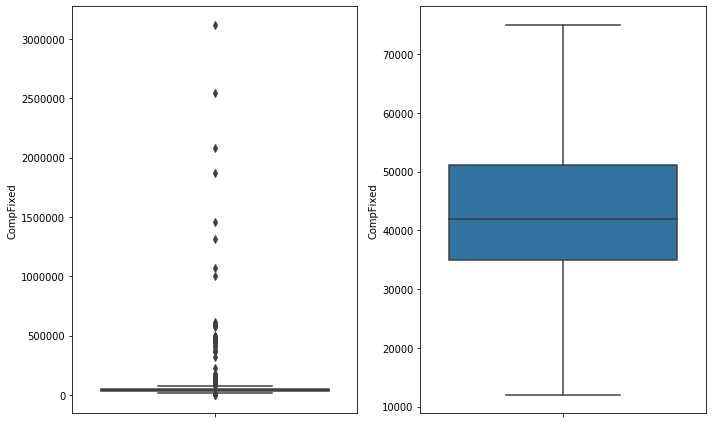

In [449]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
sns.boxplot(y=df_sw["CompFixed"], ax=ax[0])
sns.boxplot(y=df_sw["CompFixed"], showfliers=False, ax=ax[1])
plt.tight_layout()

Scatter plot of Age and CompFixed with and without logarithm of CompFixed.

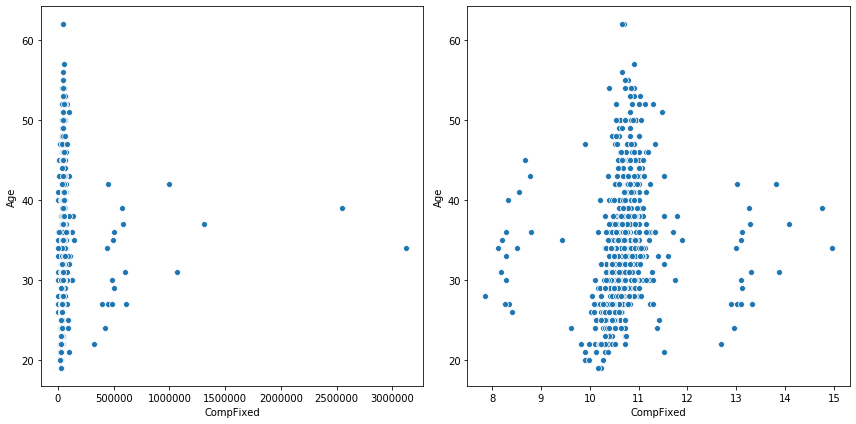

In [199]:
data = df_sw[(df_sw["Employment"] == "Employed full-time")]
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.scatterplot(x=data["CompFixed"], y=data["Age"], ax=ax[0])
sns.scatterplot(x=np.log(data["CompFixed"]), y=data["Age"], ax=ax[1])
plt.tight_layout()

Remove salary compensations over 100000 per month

In [635]:
df_sw.drop(df_sw[df_sw["CompFixed"] > 100000].index, axis=0, inplace=True)

Pairplot of all numerical data values.

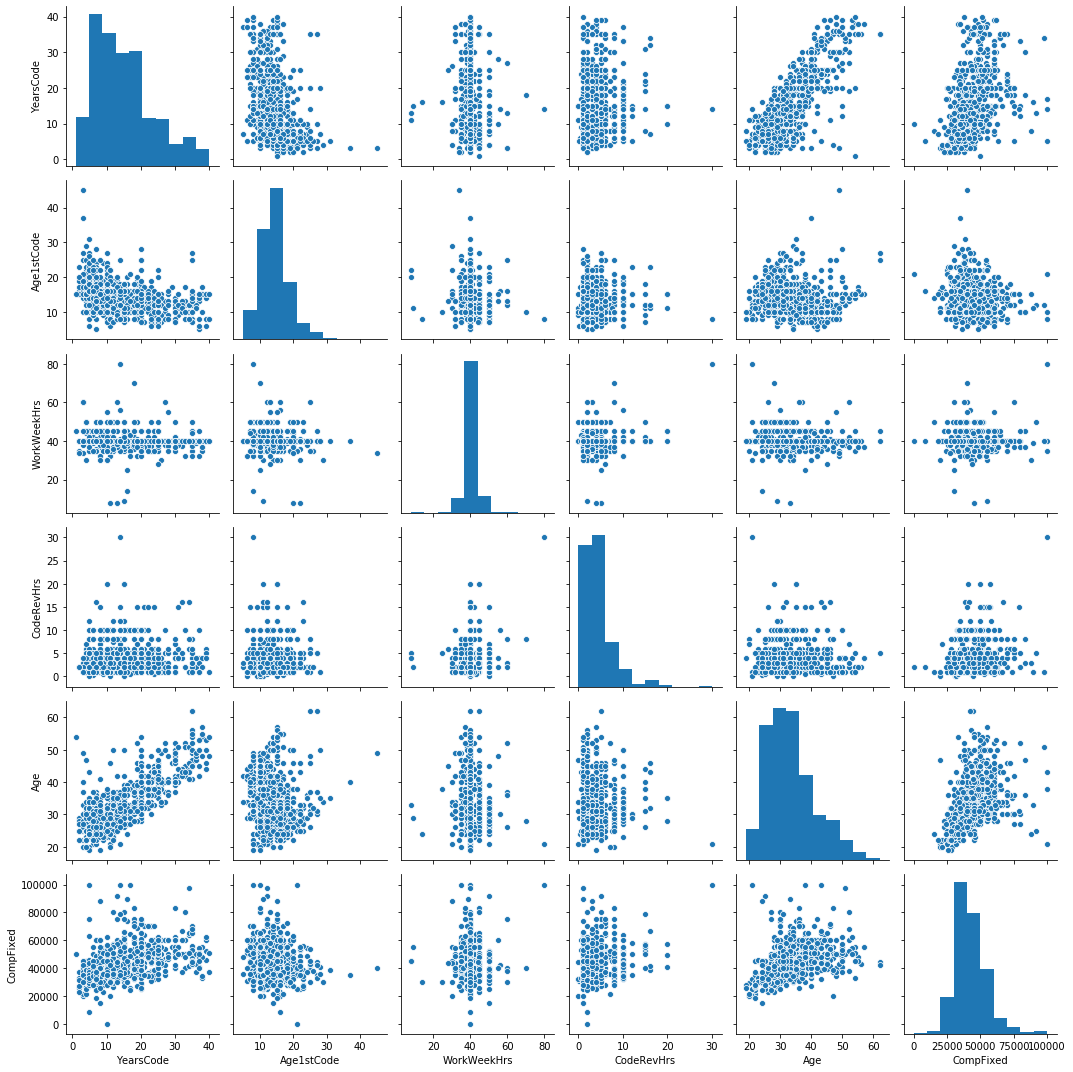

In [259]:
sns.pairplot(data)
plt.tight_layout()

PartGrid plot of numerical values with KDE and hue of the Dependents feature.

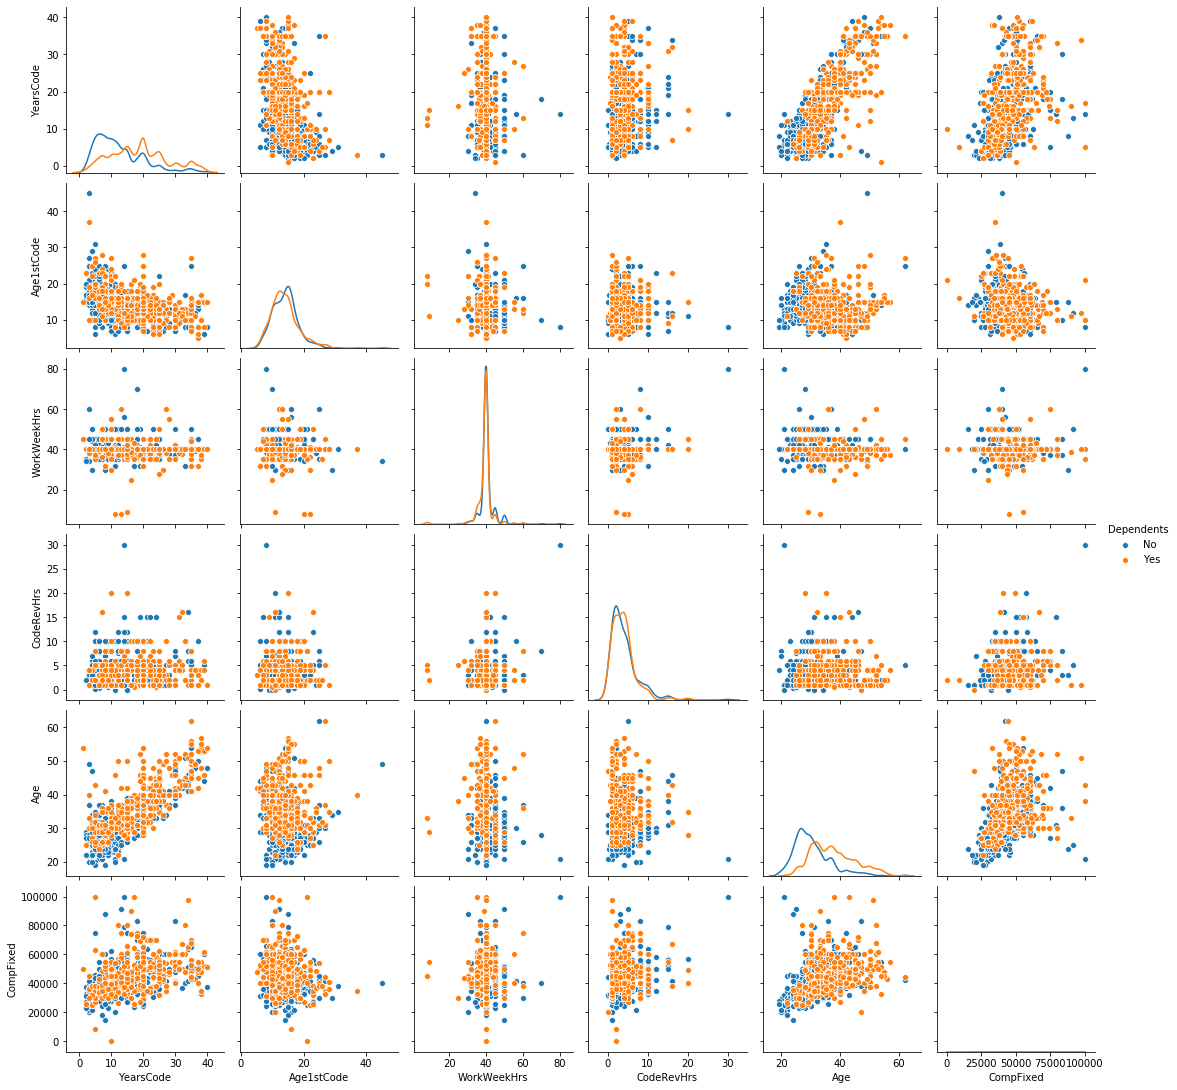

In [257]:
data = df_sw[(df_sw["Employment"] == "Employed full-time")]
g = sns.PairGrid(data, hue="Dependents")
g = g.map_diag(sns.kdeplot, bw=1)
#g = g.map_diag(sns.distplot)
g = g.map_offdiag(sns.scatterplot)
#g = g.map_lower(sns.kdeplot, bw=1)
g = g.add_legend()
#plt.tight_layout()

PairGrid plot of the numerical features but for only "Employed full-time" people with Gender as hue.

C:\Users\e070632\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\e070632\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\e070632\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\e070632\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\e070632\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estima

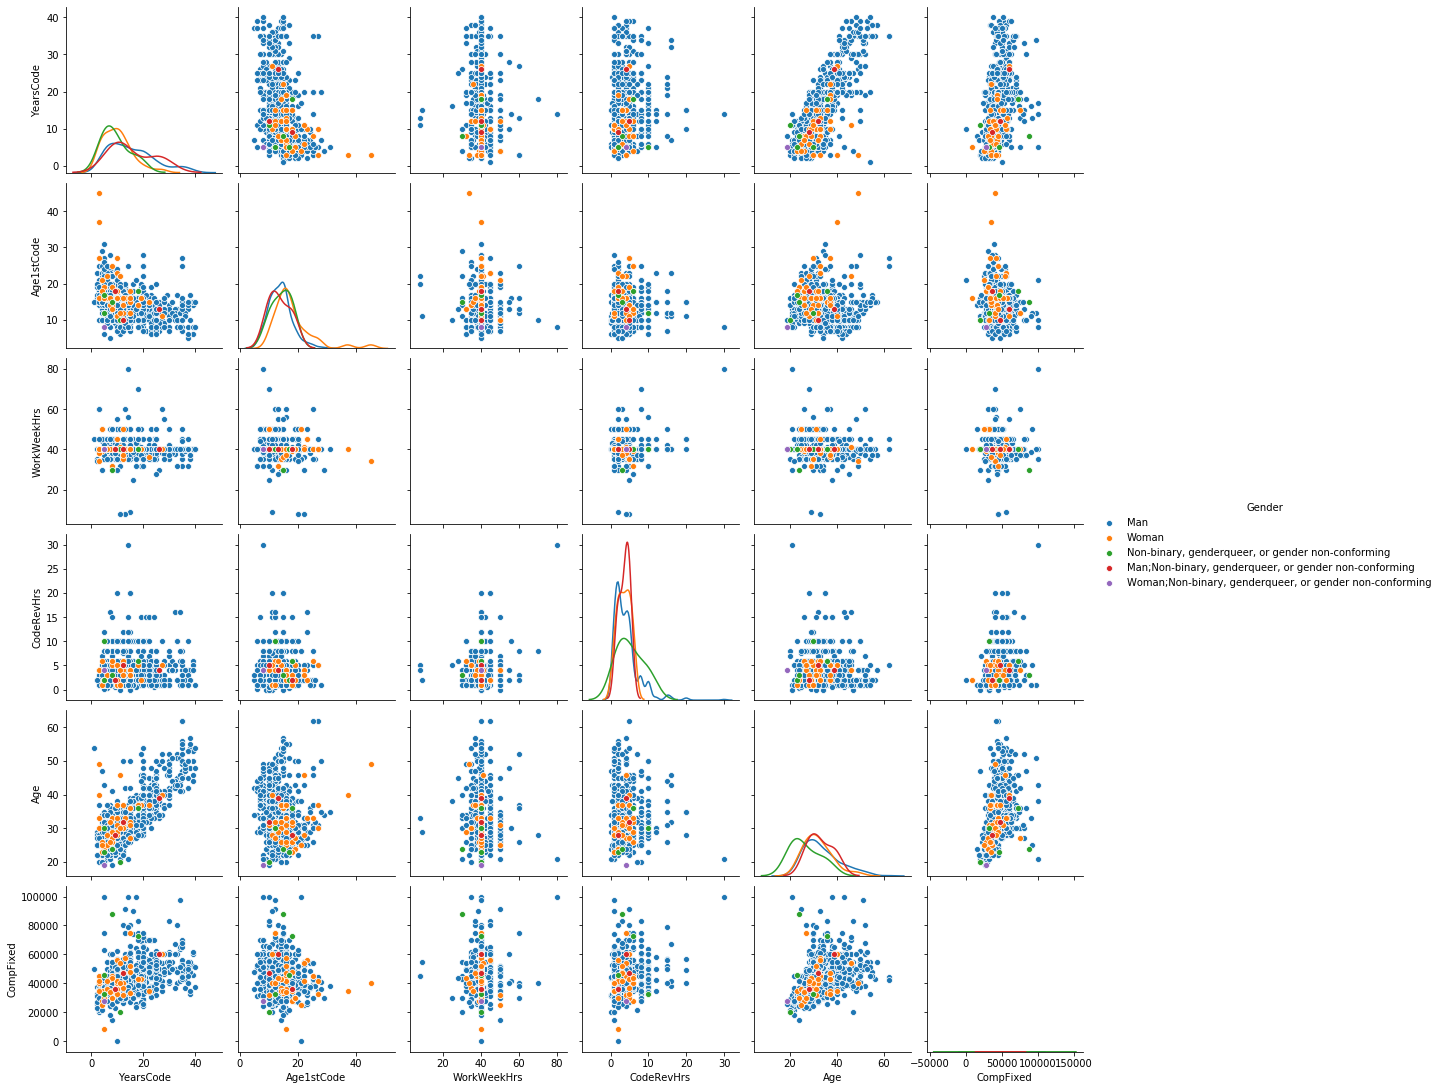

In [258]:
data = df_sw[(df_sw["Employment"] == "Employed full-time")]
g = sns.PairGrid(data, hue="Gender")
g = g.map_diag(sns.kdeplot)#, bw=2)
#g = g.map_diag(sns.distplot)
g = g.map_offdiag(sns.scatterplot)
#g = g.map_lower(sns.kdeplot, bw=1)
g = g.add_legend()

PairGrid plots of numerical data types with hue of Job Satisfaction.

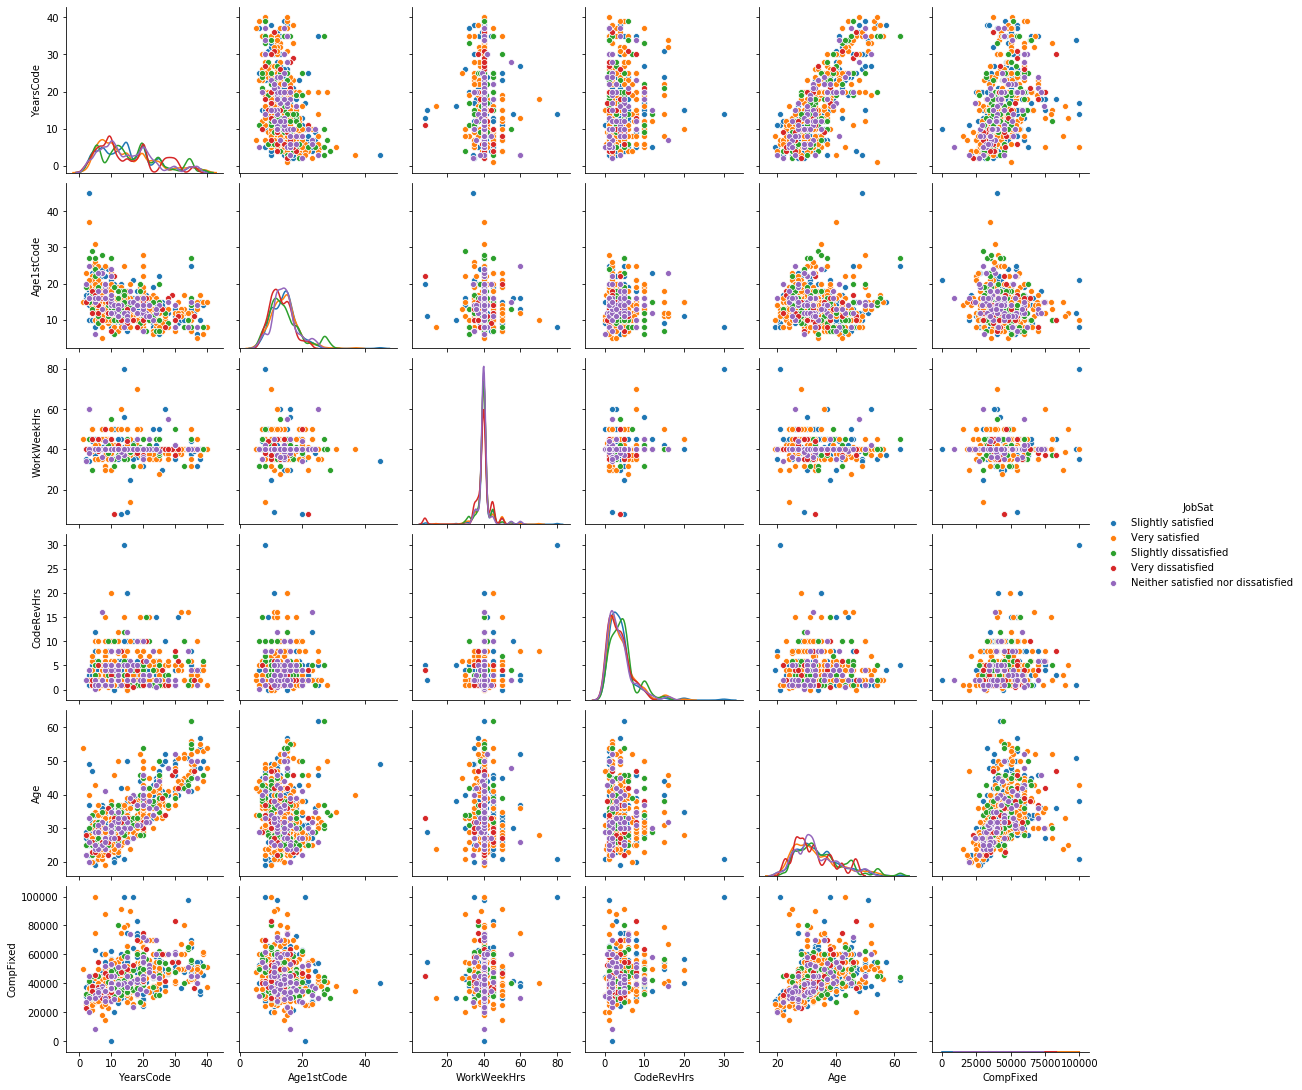

In [265]:

data = df_sw[(df_sw["Employment"] == "Employed full-time")]
g = sns.PairGrid(data, hue="JobSat")
g = g.map_diag(sns.kdeplot, bw=1)
#g = g.map_diag(sns.distplot)
g = g.map_offdiag(sns.scatterplot)
#g = g.map_lower(sns.kdeplot, bw=1)
g = g.add_legend()
#plt.tight_layout()

Boxplot of Compensation vs Dependents.

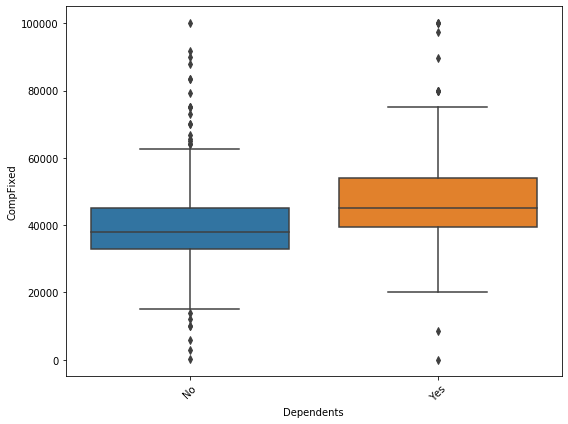

In [275]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
sns.boxplot(y=df_sw["CompFixed"], x=df_sw["Dependents"], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()

Boxplot of Compensation vs Gender.

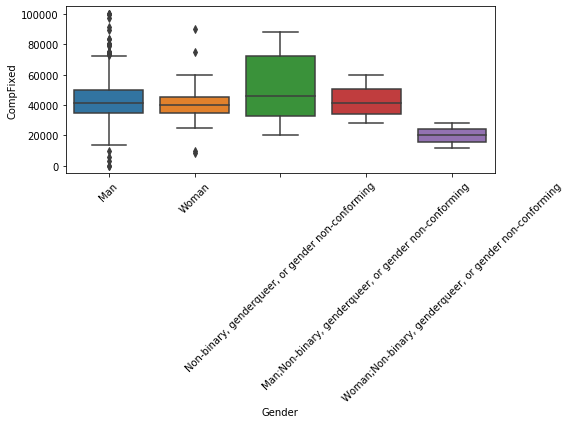

In [274]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
sns.boxplot(y=df_sw["CompFixed"], x=df_sw["Gender"], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()

Boxplot of Compensation and JobSat.

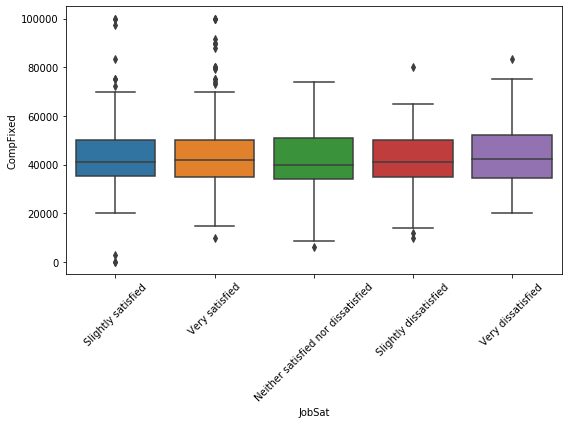

In [272]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
sns.boxplot(y=df_sw["CompFixed"], x=df_sw["JobSat"], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()

Boxplot of Compensation and CareerSat.

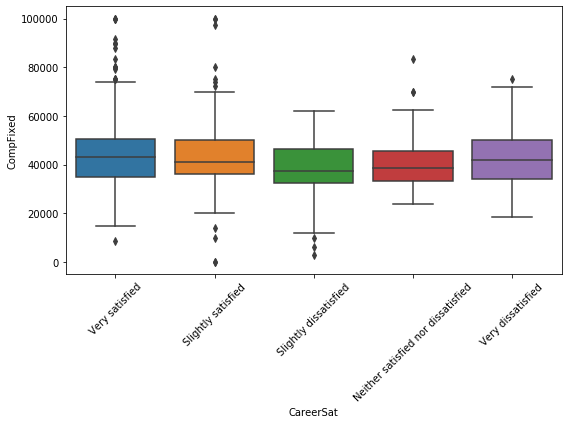

In [273]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
sns.boxplot(y=df_sw["CompFixed"], x=df_sw["CareerSat"], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()

Dendogram of the numerical variables to see if there are any interesting clustering patterns. We can see that compensation is related closely to age and years of code. And there seems to be another cluster related to coderevhrs and workweekhrs. This would have been interesting to study further, if people that spend more time with code review in general work more hours than other people.

In [286]:
imputer = SimpleImputer(strategy="median", )
test = imputer.fit_transform(df_sw.select_dtypes(exclude="O"))

In [291]:
test = df_sw.select_dtypes(exclude="O").fillna(df_sw.median()).copy()

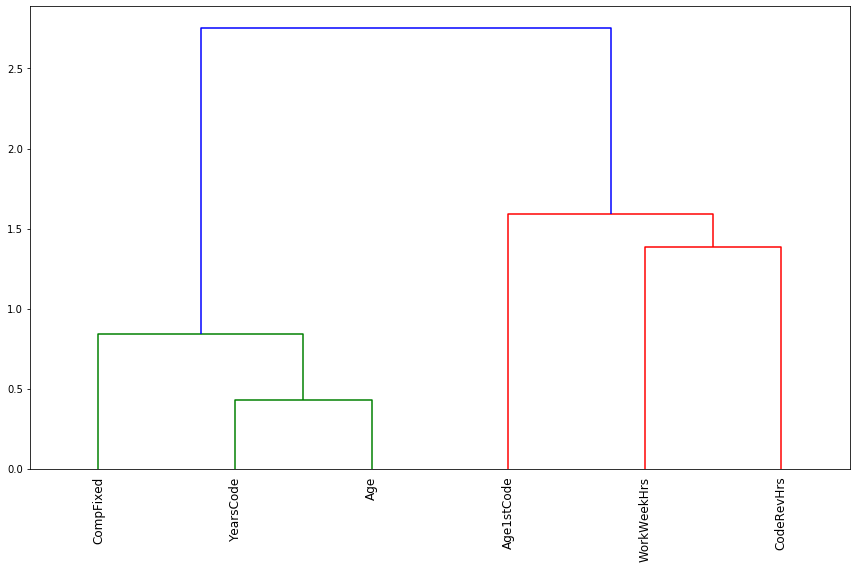

In [295]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))
corr = spearmanr(test).correlation
corr_linkage = hierarchy.ward(corr)
dendro = hierarchy.dendrogram(corr_linkage, labels=test.columns, ax=ax1,
                              leaf_rotation=90)
dendro_idx = np.arange(0, len(dendro['ivl']))


fig.tight_layout()
plt.show()

What are the correlation factor for the different programming langauges with compensation. To have a higher salary it seems like a good idea to learn R, Java and Python. Notice that ehese correlation values are quite low.

In [452]:
list_check = prog_lang_cols + ["CompFixed"]
df_sw[list_check].corr().iloc[:,-1].sort_values(ascending=False)

CompFixed                1.000000
R                        0.073162
Java                     0.062749
Python                   0.042791
Elixir                   0.028152
Bash/Shell/PowerShell    0.026174
Kotlin                   0.020771
C                        0.019613
C++                      0.011454
Ruby                     0.003383
TypeScript              -0.001493
Swift                   -0.002777
Rust                    -0.003372
VBA                     -0.005106
Erlang                  -0.005619
SQL                     -0.007916
WebAssembly             -0.009741
Clojure                 -0.011072
Assembly                -0.012075
Scala                   -0.012969
F#                      -0.017195
Dart                    -0.018353
Objective-C             -0.018731
PHP                     -0.031141
Go                      -0.037967
Other(s):               -0.046166
C#                      -0.056219
HTML/CSS                -0.066351
JavaScript              -0.082835
Name: CompFixe

What values and frequency do we have for the OrgSize feature.

In [454]:
df_sw["OrgSize"].value_counts()

20 to 99 employees                                    192
100 to 499 employees                                  147
10 to 19 employees                                    104
10,000 or more employees                               97
1,000 to 4,999 employees                               89
2-9 employees                                          81
500 to 999 employees                                   61
Just me - I am a freelancer, sole proprietor, etc.     44
5,000 to 9,999 employees                               34
Name: OrgSize, dtype: int64

Boxplot of compensation and organizational size.

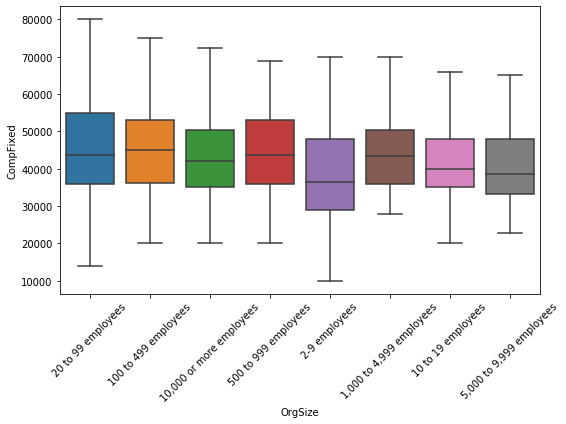

In [460]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
sns.boxplot(y="CompFixed", x="OrgSize", data=df_sw[df_sw["OrgSize"]!="Just me - I am a freelancer, sole proprietor, etc."], showfliers=False, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()

Boxplot of log of compensation vs age and python as hue.

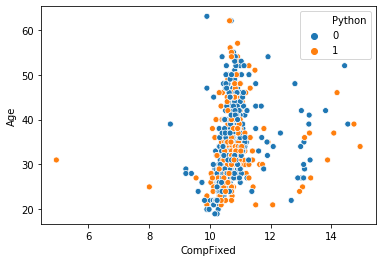

In [467]:
sns.scatterplot(x=np.log(df_sw["CompFixed"]), y=df_sw["Age"], hue=df_sw["Python"])

Shape of current dataframe.

In [469]:
df_sw.shape

(860, 109)

Correlation dataframe of numerical features.

In [479]:
df_sw[df_sw.iloc[:,:80].columns.tolist() + ["CompFixed"]].corr()

,YearsCode,Age1stCode,WorkWeekHrs,CodeRevHrs,Age,CompFixed
YearsCode,1.000000,-0.387957,-0.048927,0.054255,0.786646,0.101635
Age1stCode,-0.387957,1.000000,-0.023255,-0.056217,-0.070856,-0.060252
WorkWeekHrs,-0.048927,-0.023255,1.000000,0.172838,-0.038354,-0.008968
CodeRevHrs,0.054255,-0.056217,0.172838,1.000000,0.032868,0.038581
Age,0.786646,-0.070856,-0.038354,0.032868,1.000000,0.088120
CompFixed,0.101635,-0.060252,-0.008968,0.038581,0.088120,1.000000


Boxplot of compensation and undergradmajor.

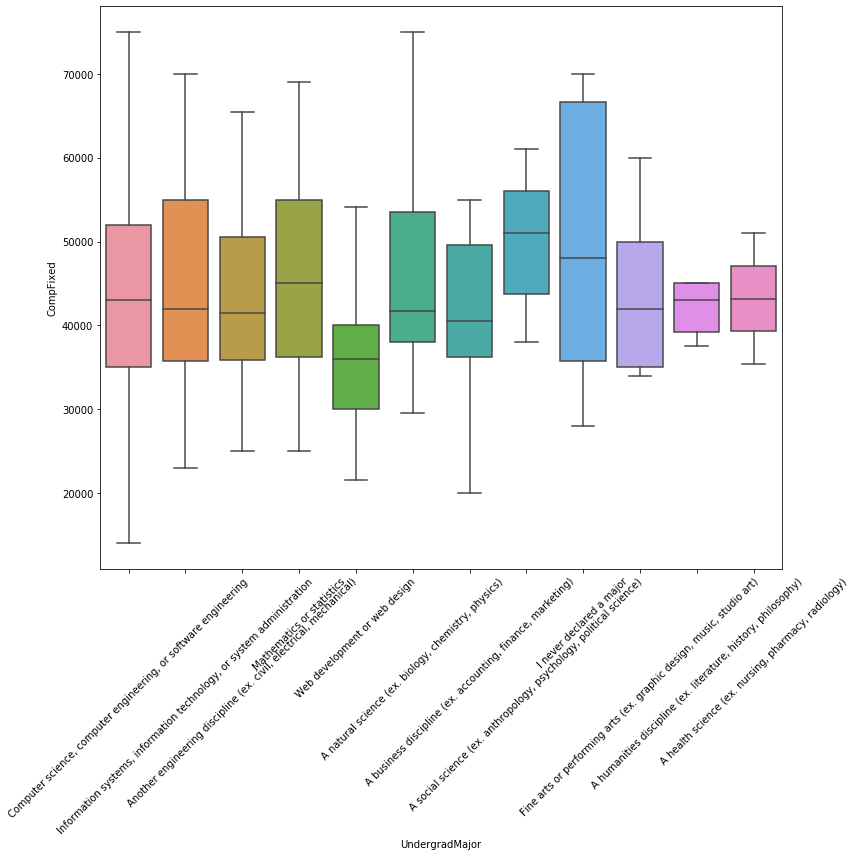

In [487]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
sns.boxplot(y=df_sw["CompFixed"], x=df_sw["UndergradMajor"], showfliers=False, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()

Boxplot of compensation and eduacition level.

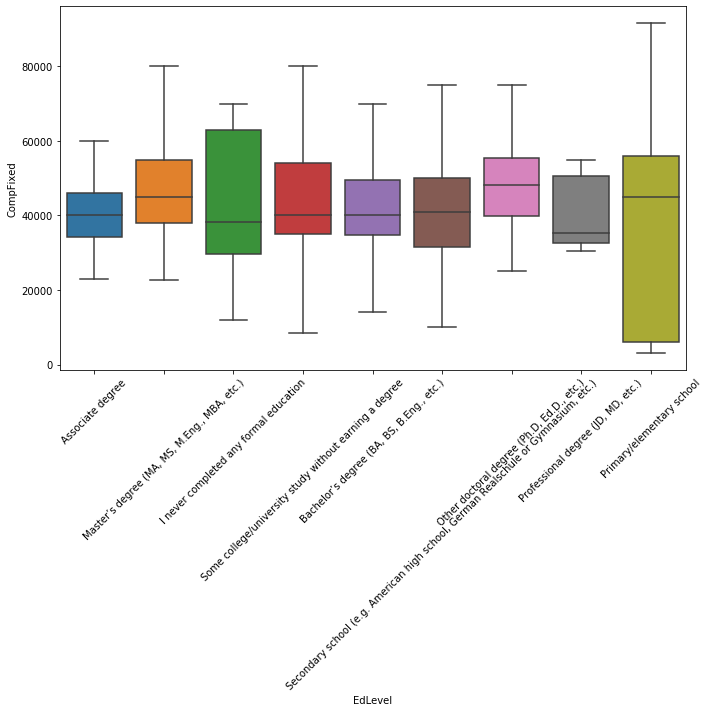

In [577]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.boxplot(y=df_sw["CompFixed"], x=df_sw["EdLevel"], showfliers=False, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()

# Business Questions

## 1. What does the salary distribution look like for the individuals in the survey?

### 1.1 Boxplot
First we plot boxplots of the compensation with and without outliers. The boxplot is plotted without outliers as well because the boxplot with the outliers makes it really hard to see the underlying distribution. From the boxplot with outliers we can see that there are quite a lot of outliers and some of them are very high in value. The maximum value is slightly above 300.000sek per month.

When plotting without the outliers it seems like the whiskers are on about equal length and that the median is about in the center of the box. The median is around 41000sek.

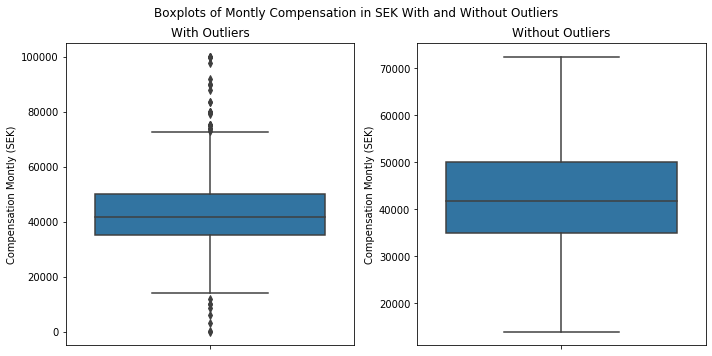

In [641]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(y=df_sw["CompFixed"], ax=ax[0])
sns.boxplot(y=df_sw["CompFixed"], showfliers=False, ax=ax[1])

ax[0].set_ylabel("Compensation Montly (SEK)")
ax[1].set_ylabel("Compensation Montly (SEK)")
ax[0].set_title("With Outliers")
ax[1].set_title("Without Outliers")
fig.suptitle('Boxplots of Montly Compensation in SEK With and Without Outliers')
plt.tight_layout()
fig.subplots_adjust(top=0.88)

### 1.2 Distribution Plot
When plotting a distribution plot of the monthly compensation is it very right skewed due to some very high compensation rates. If we on the otherhand remove all values above 200.000sek we can see that the distribution look more like a normal distribution. 

The KDE plots confirms the right skewness symptoms from the two plots.

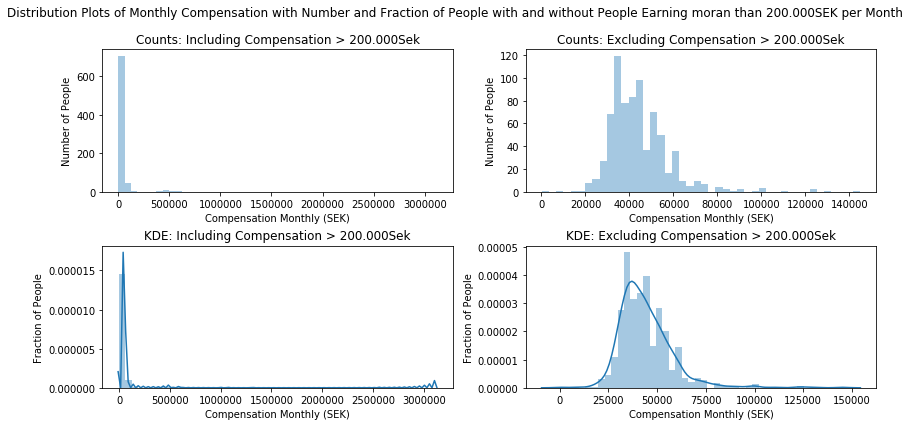

In [527]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
#df_sw[(df_sw["CompFreq"]=="Monthly") & (df_sw["Employment"] == "Employed full-time")]["CompTotal"].hist(ax=ax)
#ax.set_xlim(None, 200000)
sns.distplot(df_sw[(df_sw["Employment"] == "Employed full-time")]["CompFixed"], kde=False, ax=ax[0,0])#.hist(ax=ax))
sns.distplot(df_sw[(df_sw["Employment"] == "Employed full-time") & (df_sw["CompFixed"] <200000)]["CompFixed"], kde=False, ax=ax[0,1])#.hist(ax=ax))
sns.distplot(df_sw[(df_sw["Employment"] == "Employed full-time")]["CompFixed"], kde=True, ax=ax[1,0])#.hist(ax=ax))
sns.distplot(df_sw[(df_sw["Employment"] == "Employed full-time") & (df_sw["CompFixed"] < 200000)]["CompFixed"], kde=True, ax=ax[1,1])#.hist(ax=ax))
ax[0,0].set_ylabel("Number of People")
ax[0,1].set_ylabel("Number of People")
ax[1,0].set_ylabel("Fraction of People")
ax[1,1].set_ylabel("Fraction of People")
ax[0,0].set_xlabel("Compensation Monthly (SEK)")
ax[0,1].set_xlabel("Compensation Monthly (SEK)")
ax[1,0].set_xlabel("Compensation Monthly (SEK)")
ax[1,1].set_xlabel("Compensation Monthly (SEK)")
ax[0,0].set_title("Counts: Including Compensation > 200.000Sek")
ax[0,1].set_title("Counts: Excluding Compensation > 200.000Sek")
ax[1,0].set_title("KDE: Including Compensation > 200.000Sek")
ax[1,1].set_title("KDE: Excluding Compensation > 200.000Sek")
fig.suptitle('Distribution Plots of Monthly Compensation with Number and Fraction of People with and without People Earning moran than 200.000SEK per Month')
plt.tight_layout()
fig.subplots_adjust(top=0.88)

## 2. Is age correlated with salary compensation?

### 2.1 Scatter plots with and without logarithm of the compensation variable.
From a scatterplot of age and compensation we try to see if there is any relation between the two variables. When we plot all the data its very hard to see any patterns because it appears as all the data are along the x axis due to the outliers. If we take the log of the compensation there seems to be a small correlation between the variables.

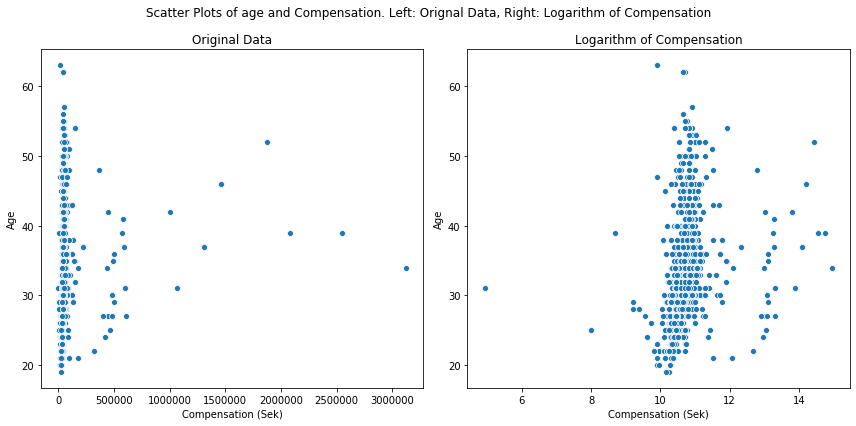

In [547]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.scatterplot(x=df_sw["CompFixed"], y=df_sw["Age"], ax=ax[0])
sns.scatterplot(x=np.log(df_sw["CompFixed"]), y=df_sw["Age"], ax=ax[1])
ax[0].set_xlabel("Compensation (Sek)")
ax[1].set_xlabel("Compensation (Sek)")
ax[0].set_title("Original Data")
ax[1].set_title("Logarithm of Compensation")
fig.suptitle('Scatter Plots of age and Compensation. Left: Orignal Data, Right: Logarithm of Compensation')
plt.tight_layout()
fig.subplots_adjust(top=0.88)

### 2.2 Identify outliers and remove and check correlation.
Identify outliers of compensation based on Tukey rule.

In [548]:
iqr = boxplot_stats(df_sw['CompFixed'])[0]["iqr"]
q1 = boxplot_stats(df_sw['CompFixed'])[0]["q3"]
q3 = boxplot_stats(df_sw['CompFixed'])[0]["q1"]

From the plot below its still hard to see any obvious correlation between the variables. However, when we quantify the correlation with Pearsons correlation equation we can see that there is a correlation. For all the data points the correlation is very weak, 0.09, however, when we remove the outliers witht the help of the Tukey rule the correlation is about 0.37 between age and compensation. 

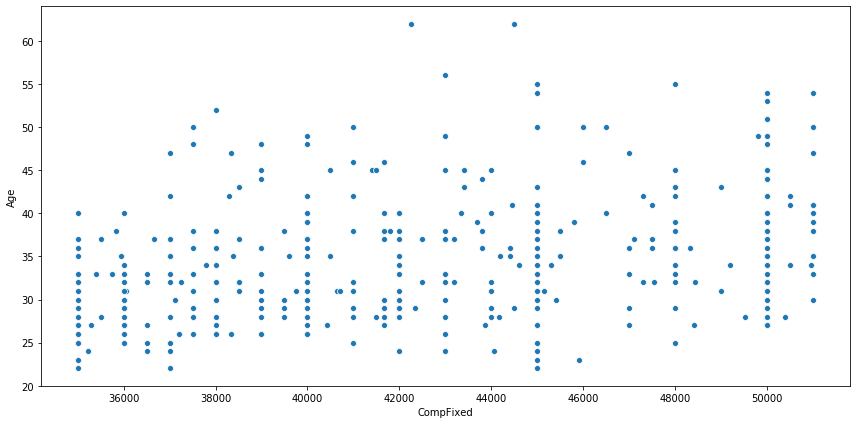

In [542]:
mask1 = df_sw['CompFixed'] < q1-iqr
mask2 = df_sw['CompFixed'] > q3 + iqr
data = df_sw[~(mask1 | mask2)]#["CompFixed"]
fig, ax = plt.subplots(1,1, figsize=(12,6))
sns.scatterplot(x=data["CompFixed"], y=data["Age"], ax=ax)
plt.tight_layout()

Correlation between compensation and age without outliers.

In [544]:
data[["CompFixed", "Age"]].corr()

,CompFixed,Age
CompFixed,1.000000,0.368915
Age,0.368915,1.000000


Correlation between compensation and age with outliers.

In [545]:
df_sw[["CompFixed", "Age"]].corr()

,CompFixed,Age
CompFixed,1.00000,0.08812
Age,0.08812,1.00000


## 3. Is there are any correlation between job satisfaction and compensation?


### 3.1 Boxplot of Compensation and Job Satisfcation
From the boxplots it seems like there is no clear difference in compensation between the different job satisfaction answer options. The boxes have about the same size and median point. The only box that stands out slightly is the "Very Dissatisfied" box that appears to have a higher compensation value of its 75th quartile value. 

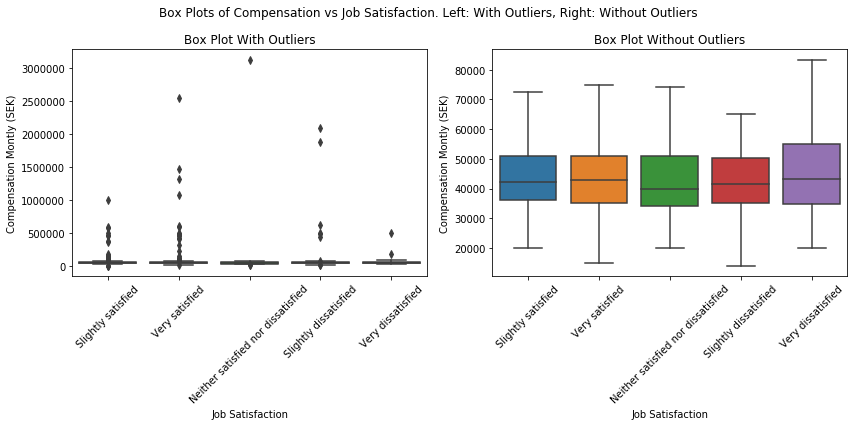

In [563]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.boxplot(y=df_sw["CompFixed"], x=df_sw["JobSat"], ax=ax[0])
sns.boxplot(y=df_sw["CompFixed"], x=df_sw["JobSat"], showfliers=False, ax=ax[1])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[0].set_ylabel("Compensation Montly (SEK)")
ax[1].set_ylabel("Compensation Montly (SEK)")
ax[0].set_xlabel("Job Satisfaction")
ax[1].set_xlabel("Job Satisfaction");
ax[0].set_title("Box Plot With Outliers")
ax[1].set_title("Box Plot Without Outliers")
fig.suptitle('Box Plots of Compensation vs Job Satisfaction. Left: With Outliers, Right: Without Outliers')
plt.tight_layout()
fig.subplots_adjust(top=0.88)

##  4. Does educational background affect compensation?

### 4.1 Boxplot of Compensation and Education Level.
From the boxplot there isnt that much variation in the compensation level between the different education levels. The one stands out is "Primary/elementary school" that has a lower 25th quartile than the other ones. However, the median value for the same box is about at the same level as the people with a Masters degree. 

From the graph one can ask the question is it worth to spend so much time on a masters or a phd degree and forego years of income and work experience when the income difference isnt higher between the different groups.

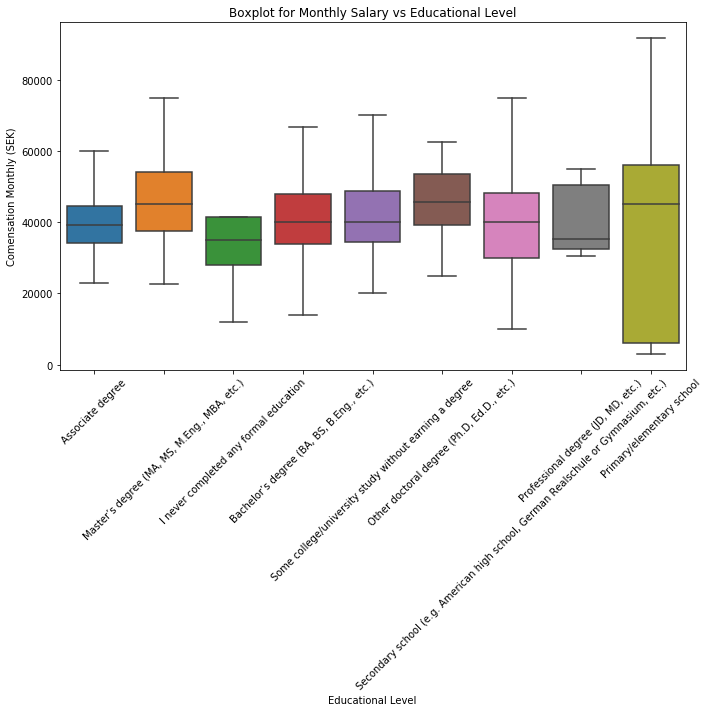

In [638]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.boxplot(y=df_sw["CompFixed"], x=df_sw["EdLevel"], showfliers=False, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("Comensation Monthly (SEK)")
ax.set_xlabel("Educational Level")
ax.set_title("Boxplot for Monthly Salary vs Educational Level")
plt.tight_layout()